<a href="https://colab.research.google.com/github/WALKWAY36/NN/blob/main/Preceptron_Orlov_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ошибка была в том,что при загрузке датасета без указания названия столбцов, либо выставить None.
#Из-за этого первая строка переходит в названия столбцов и из-за этого один объект Iris-setosa
#попал в класс Iris-versicolor
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 names = ['длина чашелистника', 'ширина чашелистника', 'длина лепестка', 'ширина лепестка', 'вид ириса'])
df[50:100]

,длина чашелистника,ширина чашелистника,длина лепестка,ширина лепестка,вид ириса
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


Iris-setosa
-1


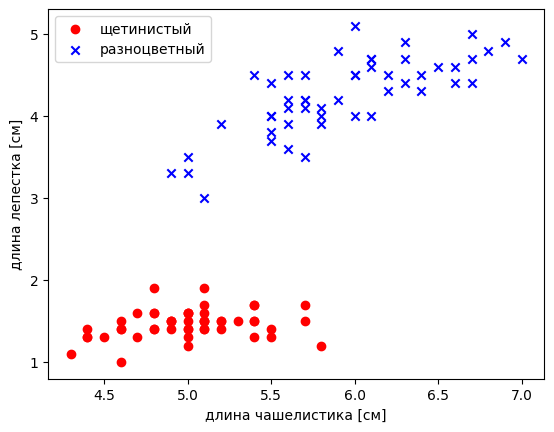

In [2]:
# Два множества являются линейно-сепарабельными
import matplotlib.pyplot as plt
import numpy as np
# Получаем значения столбца видов ириса
y = df.iloc[0:100, 4].values
print(y[0])
# Если Iris-setosa, то ему присваивается значение -1, Иначе 1
y = np.where(y == 'Iris-setosa',-1, 1)
print(y[0])
# Получение значений первого и третьего столбца
X = df.iloc[0:100,[0,2]].values
# Орисовка элементов двух классов
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker = 'o', label = 'щетинистый')
plt.scatter(X[50:100, 0],X[50:100, 1],
            color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

In [3]:
import numpy as np

class Perceptron(object):
  ''' Класс модели прецептрона'''
  # Здесь инициализируются объекты класса
  def __init__(self, eta=0.0001, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  # функция тренировки модели
  def fit(self,X,y):
    # Делает статичным рандомную генерацию
    rgen = np.random.RandomState(self.random_state)
    # Генерация нормального распределения для веса
    self.w_=rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
    # создаётся список для заполнения ошибок на каждой эпохе
    self.errors_ = []
    # цикл по эпохам
    for _ in range(self.n_iter):
      errors = 0
      # цикл по наборам X и y
      for xi, target in zip(X,y):
        # высчитывается дельта W
        update = self.eta * (target - self.predict(xi))
        # подборка весов от W1 и до Wn
        self.w_[1:] += update * xi
        # подборка веса для W0
        self.w_[0] += update
        # запись ошибки не равной 0
        errors += int(update != 0.0 )
      # заполнене ошибки в список по прохождении одной эпохи
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    # возвращает уравнение w0 +X1W1 + X2W2 + ... +XnWn
    return np.dot(X, self.w_[1:]) + self.w_[0]
  # функция предсказания
  def predict(self,X):
    # возвращает 1 если это ирис разноцветный и -1 если ирис щетинистый
    return np.where(self.net_input(X) >= 0.0 , 1, -1)

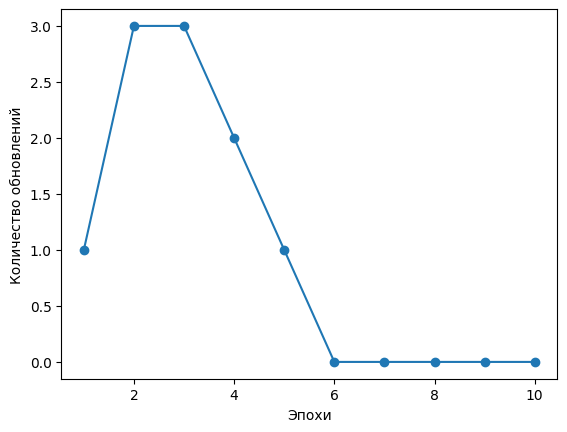

In [4]:
# Создаётся объект класса, я дописал шаг(eta)
ppn = Perceptron(eta = 0.1, n_iter = 10)
# к объекту применяем функцию тренировки
ppn.fit(X,y)
# Отрисовывем график зависимости количества эпох от количества обновлений(ошибок)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.show()

Из графика видно, что количество обновлений сначало равнялось 1.0, затем оно возрасло до 3.0,что означает о неверно подобраных весах. Наш перцептрон это понял и стал брать противоположные веса, за счёт чего количество обновлений начало снижаться и на 6 эпохе равнялось 0

In [5]:
from matplotlib.colors import ListedColormap
# Функция отрисовки карты регионов классов
def plot_decision_regions(X,y,classifier, resolution = 0.2):
  # создаём список маркеров для обозначения элементов
  markers = ('s','x','o','^','v')
  # создаём список цветов
  colors = ('red','blue','lightgreen','gray','cyan')
  # создание цветовой карты
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # Находим минимальное и максимальное значение элементов 1 класса и 2 класса
  x1_min , x1_max = X[:,0].min()-1, X[:,0].max() + 1
  x2_min , x2_max = X[:,1].min()-1, X[:,1].max() + 1
  # возвращает список координатной матрицы из списка векторов от x1_min до x1_max
  # и от x2_min до x2_max
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  # делаем предсказание, предварительно сглаживания координатную матрицу и транспонируем
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  # изменяем размерность матрицы Z на размерность какая была у xx1
  Z = Z.reshape(xx1.shape)
  # строим контур разделения двух классов
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    # Отрисовка элементов цветовой карты
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

<ipython-input-5-a7f8d84b9169>:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


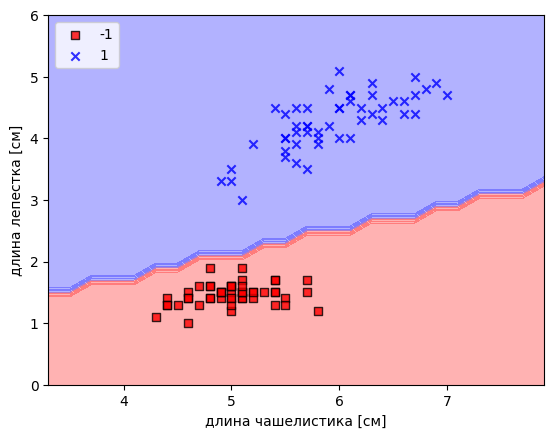

In [6]:
# вызываем функцию отрисовки цветовой карты
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

Задание : Средствами numpy создать два случайных линейносепарабельных множества с нормальным распределением. Обучить персептрон. Подобрать максимальные значения стандартного отклонения при которых персептрон сможет разделять множества.
Пример:


---
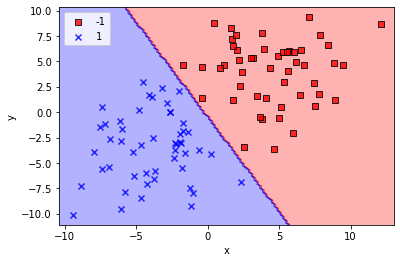


[[12.12434536  8.45528714]
 [ 9.88824359  8.62245077]
 [ 9.97182825  8.54034916]
 [ 9.42703138  8.55935785]
 [11.36540763  8.39050882]
 [ 8.1984613   8.51693824]
 [12.24481176  8.57405565]
 [ 9.7387931   8.40462994]
 [10.8190391   8.47337815]
 [10.25062962  8.50326145]
 [11.96210794  8.36268827]
 [ 8.43985929  8.53151594]
 [10.1775828   8.58461606]
 [10.11594565  8.41404841]
 [11.63376944  8.5350546 ]
 [ 9.40010873  8.36877166]
 [10.32757179  8.49613045]
 [ 9.62214158  8.33842276]
 [10.54221375  8.61214177]
 [11.08281521  8.54089005]
 [ 9.39938082  8.4975383 ]
 [11.64472371  8.42248384]
 [11.40159072  8.62737559]
 [11.00249434  8.69671017]
 [11.40085595  8.31420181]
 [ 9.81627214  8.6236164 ]
 [10.37710977  8.66276508]
 [ 9.56423057  8.53380117]
 [10.23211192  8.3800732 ]
 [11.03035547  8.58633453]
 [ 9.80833925  8.48190797]
 [10.10324647  8.43960794]
 [ 9.8128273   8.37699419]
 [ 9.65479436  8.55505375]
 [ 9.82875387  8.57928069]
 [10.4873354   8.43764693]
 [ 9.38268965  8.55205763]
 

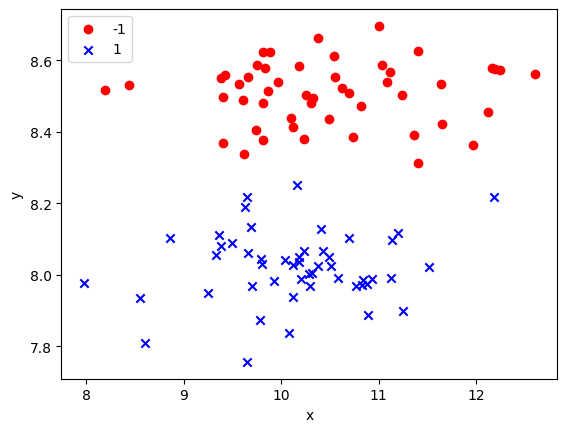

In [7]:
import pandas as pd
size = 100
# делаем статичным нормальное распределение
state = np.random.RandomState(1)
# создаём первое множество с нормальным распределением
norm1 = state.normal(loc=10, scale=1, size=size)
# создаём второе множество с нормальным распределением
norm2 = state.normal(loc=8, scale=0.1,size=size)
# делаем отступ, чтобы создать разделение на виды, например как с ирисами
norm1[:50] += 0.5
norm2[:50] += 0.5
# создаём датафрейм, чтобы поместить два множества в него
df = pd.DataFrame({'norm1':norm1, 'norm2':norm2})
# извлекаем значения этого датафрейма
X = df.iloc[0:100,[0,1]].values
print(X)

# заполняем значеня для 1-го вида(до 50 элемента) будет -1 для второго 1
y1 = [-1 for i in range(size//2)]
y2 = [1 for i in range(size//2)]
# объединяем два массива
y = y1 + y2
print(len(y))
# делаем отрисовку двух линейносепарабельных множеств, максимально приближенных
plt.scatter(norm1[:50],norm2[:50],
            color = 'red', marker = 'o', label = '-1')
plt.scatter(norm1[50:100],norm2[50:100],
            color = 'blue', marker = 'x', label = '1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

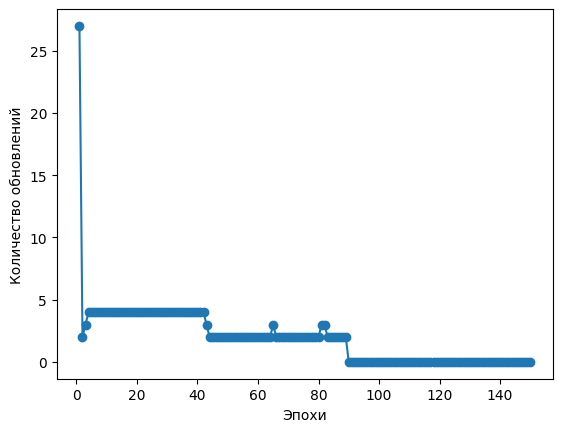

In [8]:
ppn = Perceptron(eta = 0.00001, n_iter = 150)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.show()

из графика видно, что наша модель справилась с обучением и на 90 эпохе количество обновлений было равно 0.

<ipython-input-5-a7f8d84b9169>:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


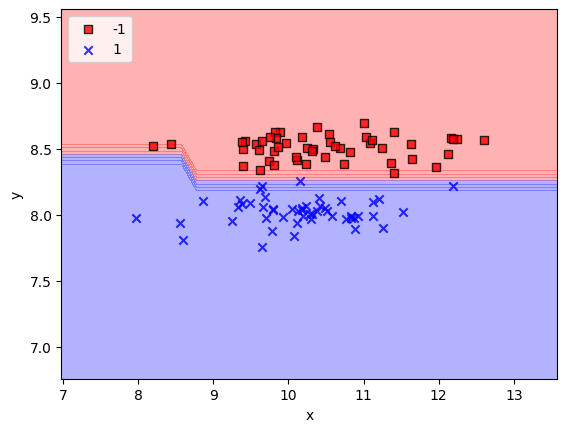

In [9]:
# отрисовка цветовой карты
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

Как мы видим, действительно, наши два линейносепарабельных класса, максимально близко расположенных друг другу были разделены успешно.